# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 9.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=00cd970dbbaf3f52cfd6a958b2034b72bdcc5dd349340a73d78690d73beb4d9f
  Stored in directory: /Users/josephnieves/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [17]:
cities

['katima mulilo',
 'nizhneangarsk',
 'polyarnyy',
 'fort stockton',
 'isafjordur',
 'aasiaat',
 'dudinka',
 'port mathurin',
 'manuguru',
 'devinuwara',
 'edinburgh of the seven seas',
 'port lincoln',
 'ocean pointe',
 'mount gambier',
 'talnakh',
 'dalandzadgad',
 'rosarito',
 "'ohonua",
 'jamestown',
 'alice springs',
 'auki',
 'ulladulla',
 'alotau',
 'forio',
 'rieti',
 'newman',
 'turpan',
 'port-aux-francais',
 'hovd',
 'kavaratti',
 'lexington',
 'port elizabeth',
 'grytviken',
 'martuk',
 'vorgashor',
 'tura',
 'blackmans bay',
 'alofi',
 'callao',
 'taiohae',
 'bethel',
 'waitangi',
 'adamstown',
 'as sulayyil',
 'porto seguro',
 'hithadhoo',
 'lebu',
 'puerto san carlos',
 'wailua homesteads',
 'kailua-kona',
 'longyearbyen',
 'hawaiian paradise park',
 "nar'yan-mar",
 'ancud',
 'betio village',
 'constantia',
 'papatowai',
 'puerto natales',
 'stanley',
 'la passe',
 'aldan',
 'hotan',
 'kodiak',
 'gamba',
 'palmer',
 'anadyr',
 'tateyama',
 'ironwood',
 'rongelap',
 'nabir

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san fransisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=6eaee665f6d7e724a6e3eb724cf9199e&q=san fransisco


In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katima mulilo
Processing Record 2 of Set 1 | nizhneangarsk
Processing Record 3 of Set 1 | polyarnyy
Processing Record 4 of Set 1 | fort stockton
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | manuguru
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | dalandzadgad
Processing Record 17 of Set 1 | rosarito
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katima mulilo,-17.5000,24.2667,29.00,5,2,2.89,NA,1722245792
1,nizhneangarsk,55.7833,109.5500,15.16,82,63,1.34,RU,1722245792
2,polyarnyy,69.1989,33.4478,11.75,81,94,5.99,RU,1722245792
3,fort stockton,30.8940,-102.8793,24.31,68,0,0.89,US,1722245793
4,isafjordur,66.0755,-23.1240,11.02,87,100,1.03,IS,1722245793


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katima mulilo,-17.5000,24.2667,29.00,5,2,2.89,NaN,1722245792
1,nizhneangarsk,55.7833,109.5500,15.16,82,63,1.34,RU,1722245792
2,polyarnyy,69.1989,33.4478,11.75,81,94,5.99,RU,1722245792
3,fort stockton,30.8940,-102.8793,24.31,68,0,0.89,US,1722245793
4,isafjordur,66.0755,-23.1240,11.02,87,100,1.03,IS,1722245793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

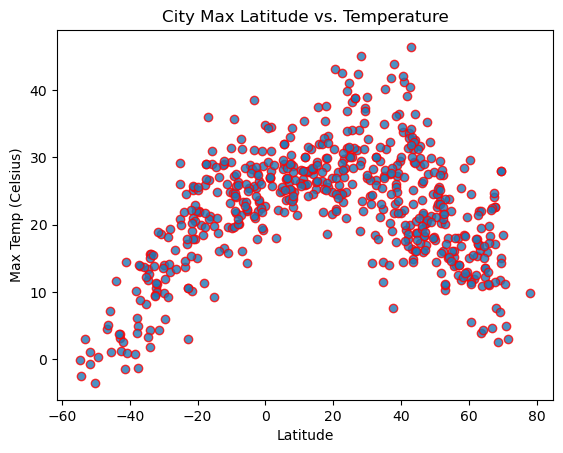

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

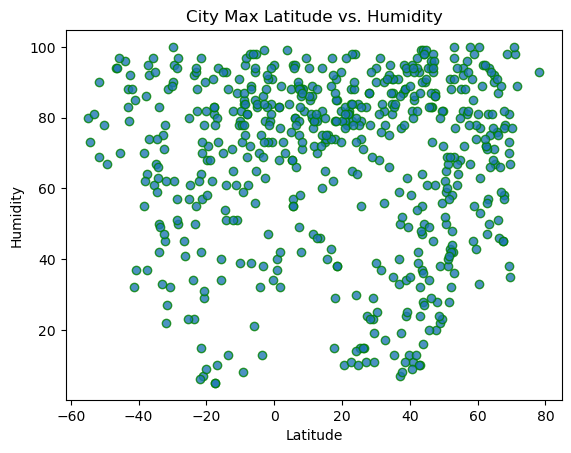

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

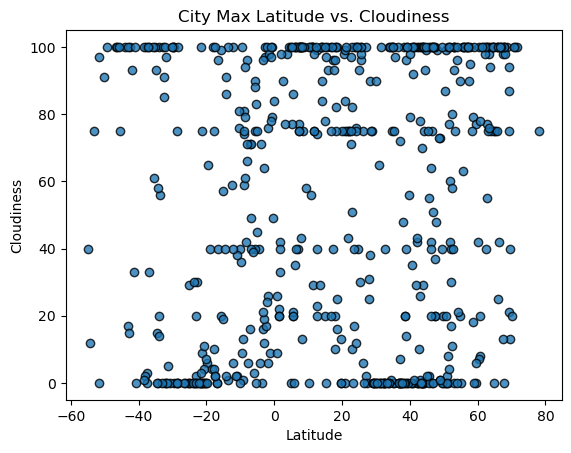

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

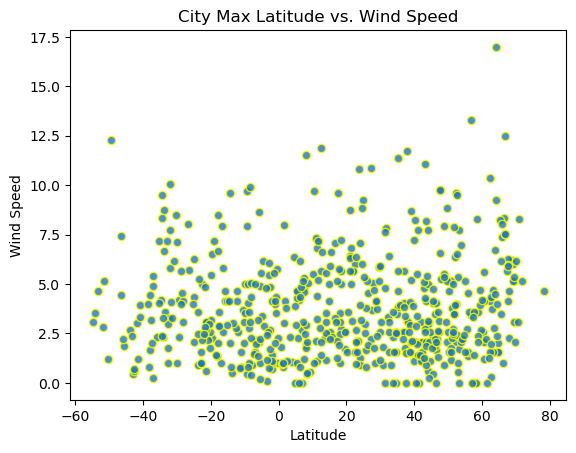

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color = "red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nizhneangarsk,55.7833,109.5500,15.16,82,63,1.34,RU,1722245792
2,polyarnyy,69.1989,33.4478,11.75,81,94,5.99,RU,1722245792
3,fort stockton,30.8940,-102.8793,24.31,68,0,0.89,US,1722245793
4,isafjordur,66.0755,-23.1240,11.02,87,100,1.03,IS,1722245793
5,aasiaat,68.7098,-52.8699,2.52,98,100,6.21,GL,1722245793


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katima mulilo,-17.5000,24.2667,29.00,5,2,2.89,NaN,1722245792
7,port mathurin,-19.6833,63.4167,22.06,68,6,6.53,MU,1722245794
9,edinburgh of the seven seas,-37.0676,-12.3116,13.85,92,33,4.90,SH,1722245795
10,port lincoln,-34.7333,135.8667,11.82,67,93,4.20,AU,1722245795
11,mount gambier,-37.8333,140.7667,6.16,86,100,1.67,AU,1722245796


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.29720916927415914


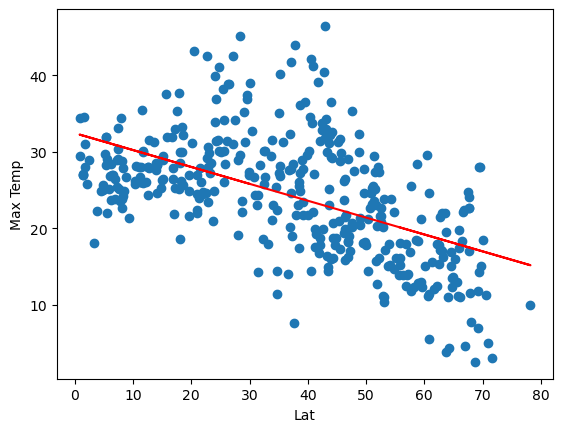

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is 0.665604237904258


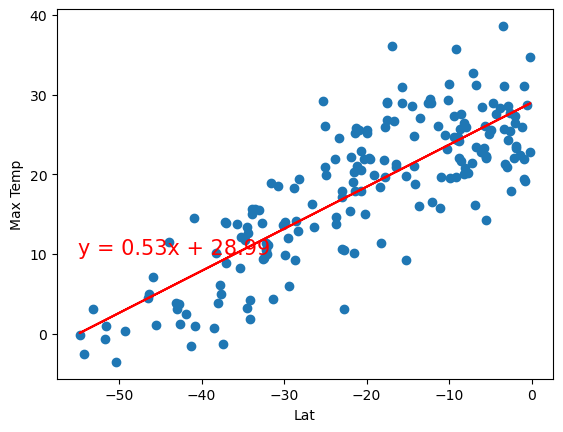

In [99]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the Northern Hemisphere Linear Regression - the higher the Latitude, the lower the temperate. Based on the Southern Hemisphere Linear Regression - the temperatues get higher as they reach Latitude 0, the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0008486973187954994


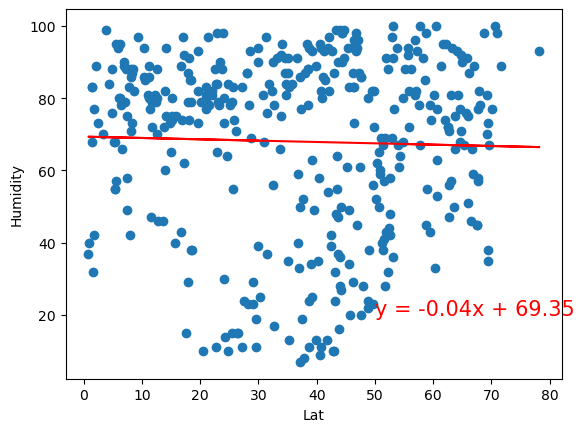

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.0003400684947745975


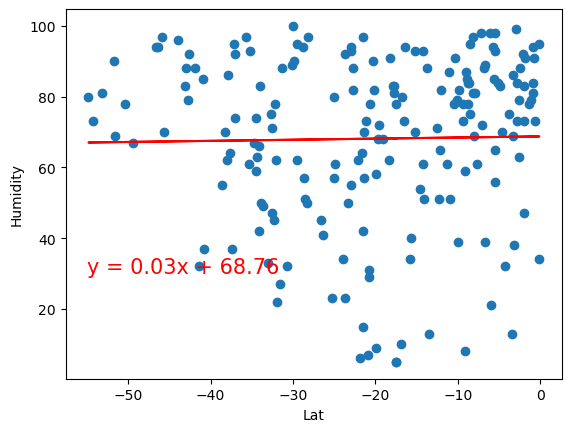

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Based on the Northern Hemisphere Linear Regression - the humidity seems the lowest in the lowest and highest latidudes.
Based on the Southern Hemisphere Linear Regression - the humidity seems the lowest at the lowest latitudes, but humidity
increases as the the latitude increases. For both Northern and Southern Hemisphere Linear Regressions, there seems to be
very minimal slope though as the humidity relates to the latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.00017071912066958492


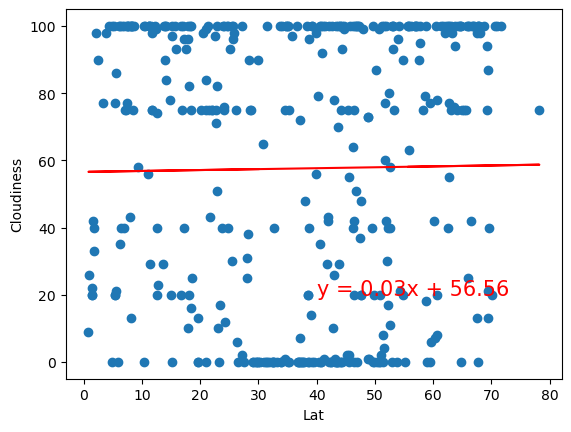

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.0007362481405990346


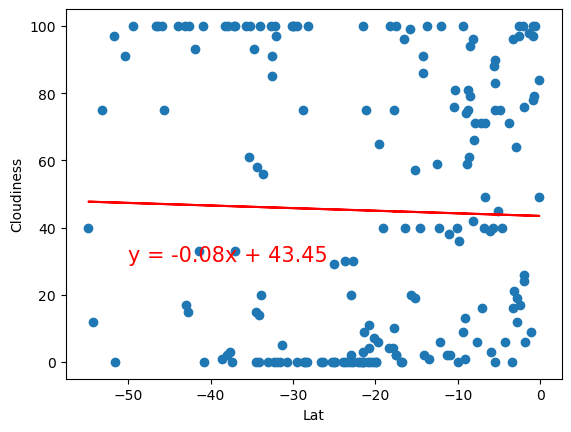

In [123]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Based on both Northern and Southern Hemisphere Linear Regressions, there is very little slope to both, and also based on the scatter plot
points in low and high latitudes, there are both low and high levels of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0066798554072188265


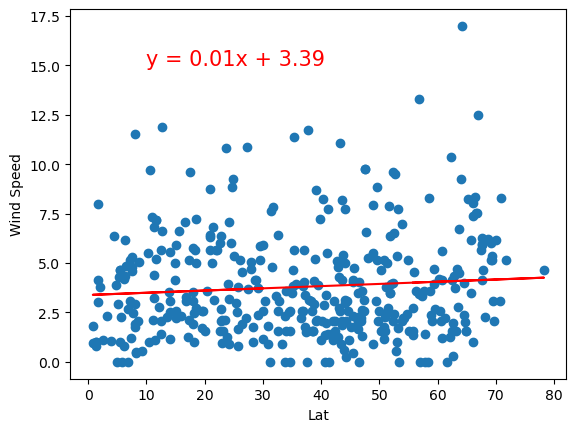

In [129]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.016759691951324325


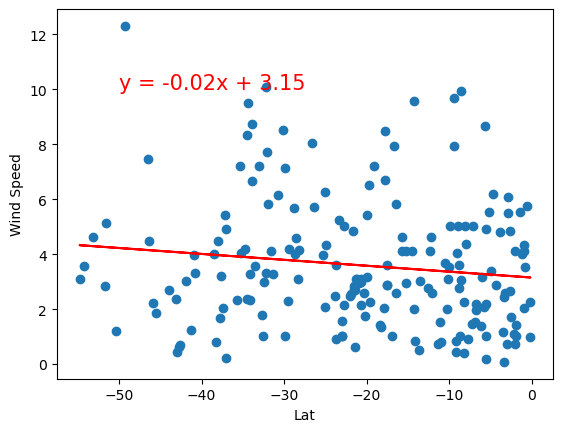

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In comparison between the Northern and Southern Hemisphere Linear Regressions - the slopes for both are very minimal.
For both Northern and Southern Hemispheres, it would seem that the wind speed across all latitudes is consistently around 0 to 10.